### 1- FINDING THE HIGHEST INTEREST MONTH WORLDWIDE

In [1]:
#  Assess global interest in fitness

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
workout = pd.read_csv('./workout/workout.csv', header=1)
workout.head()

,Week,workout: (Worldwide)
0,2018-03-18,59
1,2018-03-25,58
2,2018-04-01,61
3,2018-04-08,57
4,2018-04-15,59


In [136]:
workout = workout.set_index('Week').stack().reset_index()
workout.head()

,Week,level_1,0
0,2018-03-18,workout: (Worldwide),59
1,2018-03-25,workout: (Worldwide),58
2,2018-04-01,workout: (Worldwide),61
3,2018-04-08,workout: (Worldwide),57
4,2018-04-15,workout: (Worldwide),59


In [137]:
workout.columns = ['week','region','interest']
workout.head()

,week,region,interest
0,2018-03-18,workout: (Worldwide),59
1,2018-03-25,workout: (Worldwide),58
2,2018-04-01,workout: (Worldwide),61
3,2018-04-08,workout: (Worldwide),57
4,2018-04-15,workout: (Worldwide),59


In [138]:
workout.isnull().sum()

week        0
region      0
interest    0
dtype: int64

In [140]:
workout['week'] = pd.to_datetime(workout['week'])

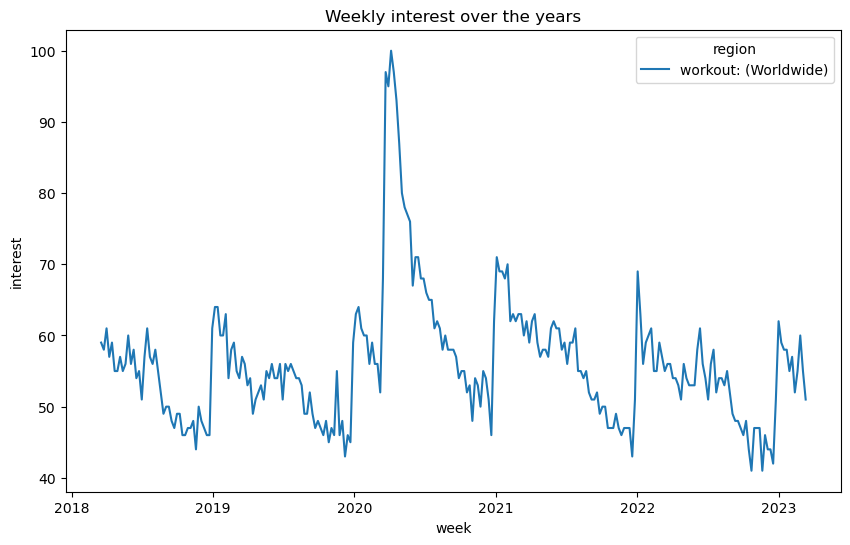

In [141]:
plt.figure(figsize=(10,6))
sns.lineplot(data = workout, x = 'week', y = 'interest', hue = 'region')
plt.title('Weekly interest over the years')
plt.show()


###### we find that the interest per week is seasonal worldwide

In [146]:
workout.head()

,week,region,interest,month
0,2018-03-18,workout: (Worldwide),59,3
1,2018-03-25,workout: (Worldwide),58,3
2,2018-04-01,workout: (Worldwide),61,4
3,2018-04-08,workout: (Worldwide),57,4
4,2018-04-15,workout: (Worldwide),59,4


In [147]:
workout['month']= workout['week'].dt.month 

In [148]:
workout.head()

,week,region,interest,month
0,2018-03-18,workout: (Worldwide),59,3
1,2018-03-25,workout: (Worldwide),58,3
2,2018-04-01,workout: (Worldwide),61,4
3,2018-04-08,workout: (Worldwide),57,4
4,2018-04-15,workout: (Worldwide),59,4


In [149]:
month_interest = workout.groupby('month')['interest'].sum().\
                                                        sort_values(ascending = False).reset_index()
month_interest

,month,interest
0,1,1442
1,5,1384
2,3,1334
3,4,1323
4,7,1267
5,6,1240
6,8,1208
7,2,1169
8,9,1111
9,12,1071


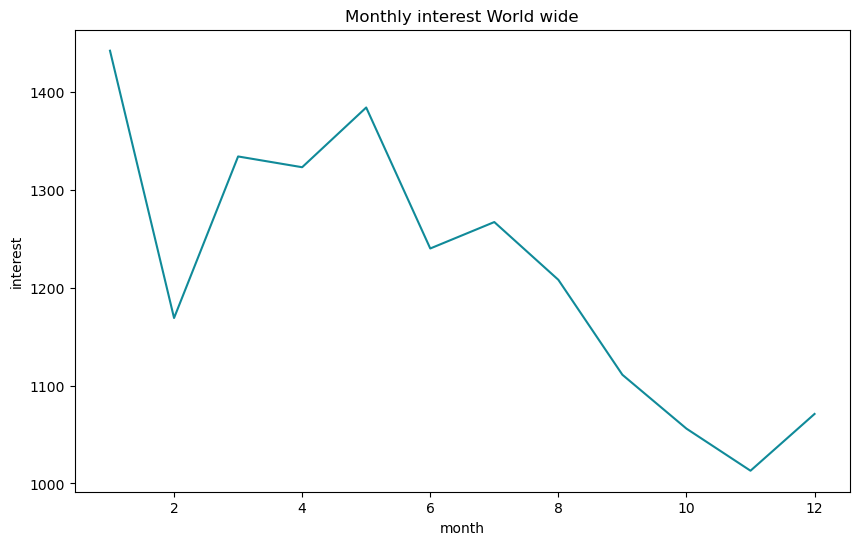

In [150]:
plt.figure(figsize = (10,6))
sns.lineplot(data = workout, x = month_interest['month'], y = month_interest['interest']\
             , color = '#108A99')
plt.title('Monthly interest World wide')
plt.show()

In [151]:
highest_month_interest = month_interest[month_interest['interest'] == month_interest['interest'].max()]
highest_month_interest= highest_month_interest['month'].values[0]
highest_month_interest

1

###### we find that the highest interest month worldwide is January

#### 2- FINDING THE HIGHEST REGION INTEREST WORLDWIDE (FOR SPECIFIC YEARS)

In [152]:
# Compare interest in home workouts, gym workouts and home gyms

In [153]:
df = pd.read_csv('./workout/three_keywords.csv' ,header = 1)
df

,Week,home workout: (Worldwide),gym workout: (Worldwide),home gym: (Worldwide)
0,2018-03-18,12,16,10
1,2018-03-25,13,17,10
2,2018-04-01,12,18,10
3,2018-04-08,12,18,9
4,2018-04-15,12,16,9
...,...,...,...,...
256,2023-02-12,12,19,11
257,2023-02-19,14,20,13
258,2023-02-26,13,19,12
259,2023-03-05,13,19,12


In [154]:
df = df.set_index('Week').stack().reset_index()
df.columns = ['week','region','interest']

In [155]:
df['week'] = pd.to_datetime(df['week'])

In [157]:
# filtering for the years 2022 and 2023 only
df_22_23= df[(df['week'].dt.year >= 2022) & (df['week'].dt.year <= 2023)]

In [158]:
df_22_23.head()

,week,region,interest
594,2022-01-02,home workout: (Worldwide),21
595,2022-01-02,gym workout: (Worldwide),19
596,2022-01-02,home gym: (Worldwide),21
597,2022-01-09,home workout: (Worldwide),19
598,2022-01-09,gym workout: (Worldwide),17


In [159]:
stats_22_23 = df_22_23.groupby('region')['interest'].sum().reset_index()
stats_22_23

,region,interest
0,gym workout: (Worldwide),1155
1,home gym: (Worldwide),781
2,home workout: (Worldwide),837


C:\Users\sasa_\AppData\Local\Temp\ipykernel_17376\3059975459.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = stats_22_23, x = 'region', y= 'interest', ci = False, alpha = 0.8)


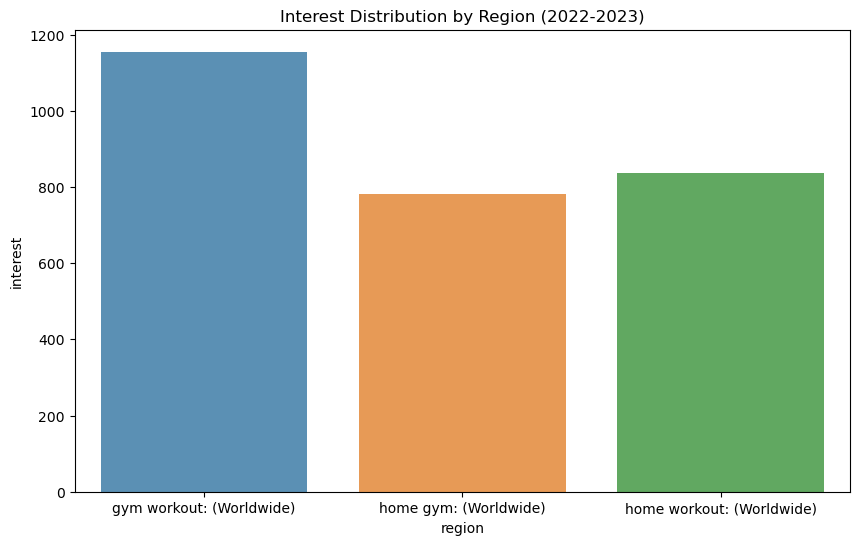

In [160]:
plt.figure(figsize = (10,6))
sns.barplot(data = stats_22_23, x = 'region', y= 'interest', ci = False, alpha = 0.8)
plt.title('Interest Distribution by Region (2022-2023)')
plt.show()

In [161]:
highest_region_interest_22_23 = stats_22_23[stats_22_23['interest'] == stats_22_23['interest'].max()]
highest_region_interest_22_23= stats_22_23['region'].values[0]
highest_region_interest_22_23

'gym workout: (Worldwide)'

###### we find that gym workout generated the highest interest in 2022 and 2023 worldwide 

In [162]:
## filtering for 2020 only
df_2020 = df[df['week'].dt.year == 2020]

In [163]:
df_2020.groupby('region')['interest'].sum()

region
gym workout: (Worldwide)      716
home gym: (Worldwide)        1105
home workout: (Worldwide)    1528
Name: interest, dtype: int64

C:\Users\sasa_\AppData\Local\Temp\ipykernel_17376\2163474071.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df_2020, x = 'region', y= 'interest', ci = False, alpha = 0.8)


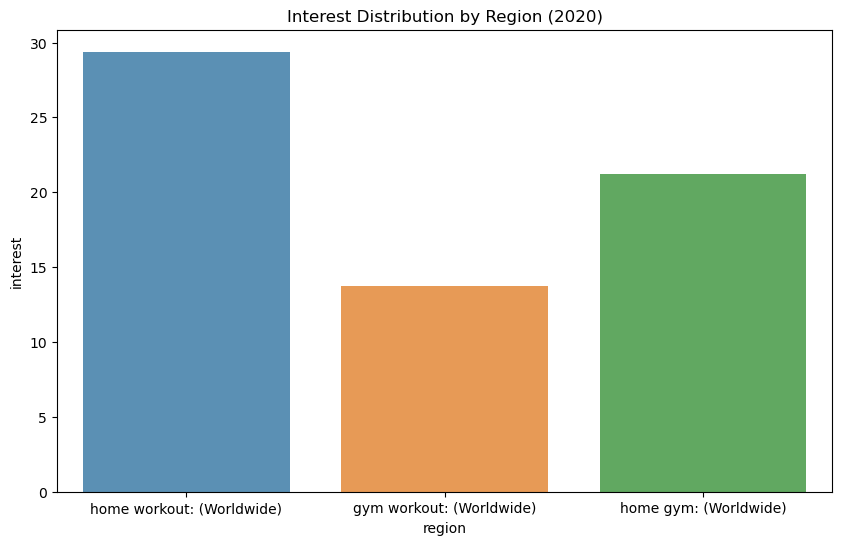

In [164]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_2020, x = 'region', y= 'interest', ci = False, alpha = 0.8)
plt.title('Interest Distribution by Region (2020)')
plt.show()

In [165]:
peak_covid = 'home workout: (Worldwide)'

###### we find that home workout generated the highest interest worldwide in 2020

### 3- FINDING THE TOP COUNTRY INTEREST 

In [166]:
# Segment global interest by region

In [167]:
geo_df = pd.read_csv('workout/workout_global.csv', header = 1)
geo_df

,Country,workout: (3/16/18 - 3/16/23)
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN
...,...,...
245,Tokelau,NaN
246,Tuvalu,NaN
247,U.S. Outlying Islands,NaN
248,Vatican City,NaN


In [168]:
geo_df.isnull().sum()

Country                           0
workout: (3/16/18 - 3/16/23)    189
dtype: int64

In [169]:
geo_df = geo_df.dropna()

In [170]:
geo_df.head()

,Country,workout: (3/16/18 - 3/16/23)
5,United States,100.0
12,Canada,86.0
18,Australia,77.0
22,New Zealand,73.0
23,Lebanon,73.0


In [171]:
geo_df.columns = ['country', 'interest']

In [172]:
top_25_countries= geo_df.groupby('country')['interest'].sum().sort_values(ascending = False)\
                                                             .reset_index()[:25]

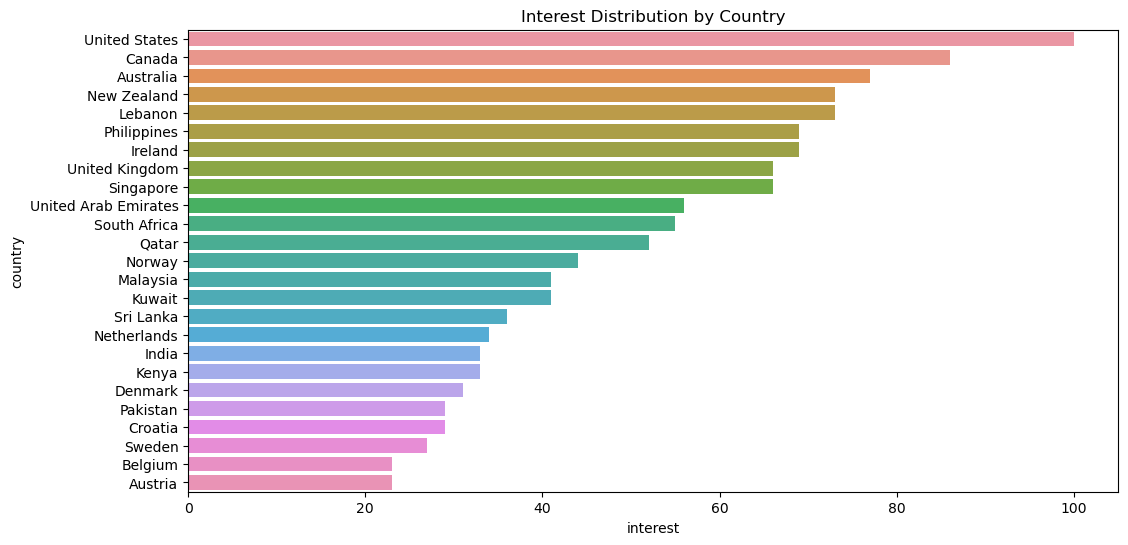

In [173]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_25_countries , y = 'country', x = 'interest')
plt.title('Interest Distribution by Country')
plt.show()

In [174]:
top_country = top_25_countries['country'].values[0]

In [175]:
top_country

'United States'

###### United states has the highest interest generated

#### 4- FINDING TOP INTEREST HOMEWORKOUT COUNTRY GIVEN SPECIFIC COUNTRIES

In [176]:
# Assessing regional demand for home workouts, gym workouts and home gyms

In [177]:
geo_categories = pd.read_csv('workout/geo_three_keywords.csv', header = 1)
geo_categories

,Country,home workout: (3/16/18 - 3/16/23),gym workout: (3/16/18 - 3/16/23),home gym: (3/16/18 - 3/16/23)
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN
...,...,...,...,...
245,Tokelau,NaN,NaN,NaN
246,Tuvalu,NaN,NaN,NaN
247,U.S. Outlying Islands,NaN,NaN,NaN
248,Vatican City,NaN,NaN,NaN


In [178]:
geo_categories = geo_categories.dropna()

In [179]:
geo_categories.head()

,Country,home workout: (3/16/18 - 3/16/23),gym workout: (3/16/18 - 3/16/23),home gym: (3/16/18 - 3/16/23)
15,South Africa,41%,33%,26%
16,Australia,30%,34%,36%
22,Canada,40%,27%,33%
23,Philippines,52%,38%,10%
25,United Kingdom,34%,36%,30%


In [180]:
fil_geo = geo_categories.set_index('Country').stack().reset_index()

In [181]:
fil_geo.columns = ['country','region','interest']
fil_geo

,country,region,interest
0,South Africa,home workout: (3/16/18 - 3/16/23),41%
1,South Africa,gym workout: (3/16/18 - 3/16/23),33%
2,South Africa,home gym: (3/16/18 - 3/16/23),26%
3,Australia,home workout: (3/16/18 - 3/16/23),30%
4,Australia,gym workout: (3/16/18 - 3/16/23),34%
...,...,...,...
136,Brazil,gym workout: (3/16/18 - 3/16/23),30%
137,Brazil,home gym: (3/16/18 - 3/16/23),29%
138,Japan,home workout: (3/16/18 - 3/16/23),34%
139,Japan,gym workout: (3/16/18 - 3/16/23),37%


In [182]:
fil_geo['interest'] = fil_geo['interest'].str.replace('%','')

In [183]:
fil_geo

,country,region,interest
0,South Africa,home workout: (3/16/18 - 3/16/23),41
1,South Africa,gym workout: (3/16/18 - 3/16/23),33
2,South Africa,home gym: (3/16/18 - 3/16/23),26
3,Australia,home workout: (3/16/18 - 3/16/23),30
4,Australia,gym workout: (3/16/18 - 3/16/23),34
...,...,...,...
136,Brazil,gym workout: (3/16/18 - 3/16/23),30
137,Brazil,home gym: (3/16/18 - 3/16/23),29
138,Japan,home workout: (3/16/18 - 3/16/23),34
139,Japan,gym workout: (3/16/18 - 3/16/23),37


In [184]:
# the task required me to only include these countries 
to_filter_counters= ["Philippines", "Singapore", "United Arab Emirates",\
                      "Qatar", "Kuwait", "Lebanon", "Malaysia", "Sri Lanka", "India","Pakistan"]

In [72]:
MESA = fil_geo[fil_geo['country'].isin(to_filter_counters)]
MESA

,country,region,interest
9,Philippines,home workout: (3/16/18 - 3/16/23),52
10,Philippines,gym workout: (3/16/18 - 3/16/23),38
11,Philippines,home gym: (3/16/18 - 3/16/23),10
18,India,home workout: (3/16/18 - 3/16/23),28
19,India,gym workout: (3/16/18 - 3/16/23),50
20,India,home gym: (3/16/18 - 3/16/23),22
27,United Arab Emirates,home workout: (3/16/18 - 3/16/23),32
28,United Arab Emirates,gym workout: (3/16/18 - 3/16/23),47
29,United Arab Emirates,home gym: (3/16/18 - 3/16/23),21
30,Sri Lanka,home workout: (3/16/18 - 3/16/23),33


In [185]:
# finding the top home workout countries from the list specified
home_workout = MESA[MESA['region'] == 'home workout: (3/16/18 - 3/16/23)']
home_workout

,country,region,interest
9,Philippines,home workout: (3/16/18 - 3/16/23),52
18,India,home workout: (3/16/18 - 3/16/23),28
27,United Arab Emirates,home workout: (3/16/18 - 3/16/23),32
30,Sri Lanka,home workout: (3/16/18 - 3/16/23),33
33,Singapore,home workout: (3/16/18 - 3/16/23),37
39,Pakistan,home workout: (3/16/18 - 3/16/23),31
42,Malaysia,home workout: (3/16/18 - 3/16/23),47


In [186]:
home_workout['interest'] = home_workout['interest'].astype(int)

C:\Users\sasa_\AppData\Local\Temp\ipykernel_17376\2099661523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_workout['interest'] = home_workout['interest'].astype(int)


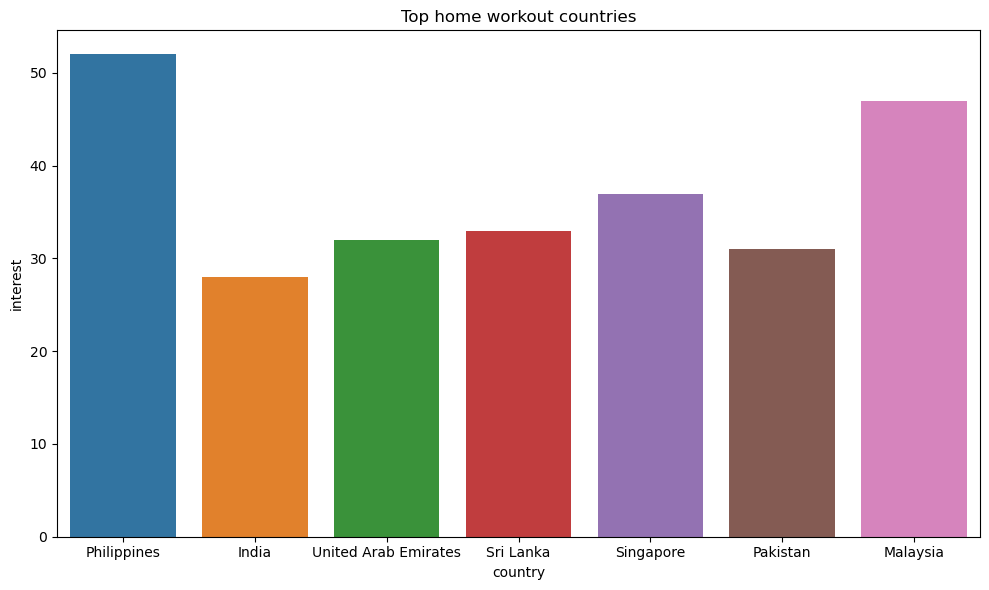

In [187]:
plt.figure(figsize = (10,6))
sns.barplot(data = home_workout, x = 'country', y = 'interest')
plt.title('Top home workout countries')
plt.tight_layout()
plt.show()

In [188]:
home_workout.groupby('country')['interest'].sum().sort_values(ascending = False).index[0]

'Philippines'

In [189]:
top_country_homeworkout = 'Philippines'

###### Philippines has the highest interest generated regarding home workout 

### 5- FINDING TOP INTEREST CATEGORY IN SINGAPORE
###  (WORKOUT NOT INCLUDED)

In [190]:
# Assess the split of interest by country and category

In [191]:
sing = pd.read_csv('workout/yoga_zumba_sng.csv', header = 1 )
sing

,Week,yoga: (Singapore),workout: (Singapore),zumba: (Singapore),weight training: (Singapore),weight loss: (Singapore)
0,2018-03-18,9,22,7,<1,3
1,2018-03-25,10,21,6,0,3
2,2018-04-01,9,24,5,0,3
3,2018-04-08,8,23,6,<1,4
4,2018-04-15,9,24,7,<1,3
...,...,...,...,...,...,...
256,2023-02-12,10,27,5,0,2
257,2023-02-19,11,29,4,<1,4
258,2023-02-26,12,31,5,0,3
259,2023-03-05,11,29,3,0,4


In [194]:
# filtering and correcting dtypes
sing = sing[sing['weight training: (Singapore)'] != '<1'].copy()
sing['weight training: (Singapore)'] = sing['weight training: (Singapore)'].astype(int)

In [195]:
sing.head()

,Week,yoga: (Singapore),workout: (Singapore),zumba: (Singapore),weight training: (Singapore),weight loss: (Singapore)
1,2018-03-25,10,21,6,0,3
2,2018-04-01,9,24,5,0,3
6,2018-04-29,9,23,7,1,3
8,2018-05-13,9,20,6,0,3
9,2018-05-20,9,24,7,0,3


In [196]:
sing = sing.drop('workout: (Singapore)', axis = 1)
sing = sing.set_index('Week').stack().reset_index()
sing.columns = ['week','category','interest']

In [197]:
sing.head()

,week,category,interest
0,2018-03-25,yoga: (Singapore),10
1,2018-03-25,zumba: (Singapore),6
2,2018-03-25,weight training: (Singapore),0
3,2018-03-25,weight loss: (Singapore),3
4,2018-04-01,yoga: (Singapore),9


In [198]:
cat_sing = sing.groupby('category')['interest'].sum().sort_values(ascending = False).reset_index()
cat_sing

,category,interest
0,yoga: (Singapore),2678
1,zumba: (Singapore),1751
2,weight loss: (Singapore),697
3,weight training: (Singapore),70


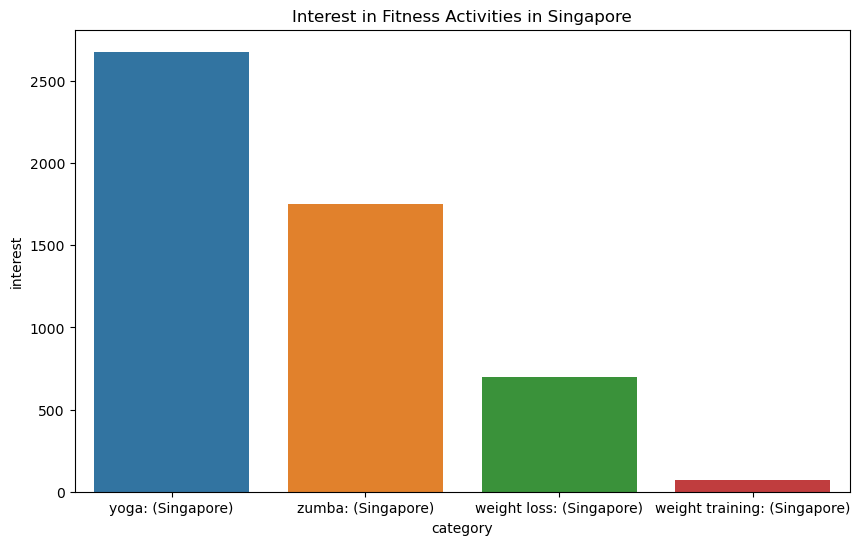

In [199]:
plt.figure(figsize = (10,6))
sns.barplot(data = cat_sing, x = 'category', y = 'interest')
plt.title("Interest in Fitness Activities in Singapore" )
plt.show()

In [200]:
top_category_in_sing = cat_sing[cat_sing['interest'] == cat_sing['interest'].max() ]['category'].values[0]
top_category_in_sing

'yoga: (Singapore)'

###### we find that yoga generated the highest interest in Singapore

### 6- FINDING TOP INTEREST CATEGORY IN PHILIPPINES
###  (WORKOUT NOT INCLUDED)

In [203]:
phil = pd.read_csv('workout/yoga_zumba_phl.csv', header  =1 )
phil

,Week,yoga: (Philippines),workout: (Philippines),zumba: (Philippines),bodybuilding: (Philippines),weight loss: (Philippines)
0,2018-03-18,6,30,39,1,3
1,2018-03-25,6,28,35,1,3
2,2018-04-01,6,28,33,1,3
3,2018-04-08,6,29,36,1,3
4,2018-04-15,6,28,36,1,3
...,...,...,...,...,...,...
256,2023-02-12,4,30,37,<1,3
257,2023-02-19,4,30,37,<1,3
258,2023-02-26,4,29,41,<1,3
259,2023-03-05,4,34,45,<1,3


In [204]:
# filtering
phil = phil[(phil['yoga: (Philippines)'] != '<1') & (phil['bodybuilding: (Philippines)'] != '<1')].copy()

In [205]:
# Correcting dtypes
phil['yoga: (Philippines)'] = phil['yoga: (Philippines)'].astype(int)
phil['bodybuilding: (Philippines)'] = phil['bodybuilding: (Philippines)'].astype(int)

In [206]:
phil = phil.drop('workout: (Philippines)' ,axis = 1)
phil = phil.set_index('Week').stack().reset_index()
phil.columns = ['week','category','interest']

In [207]:
phil

,week,category,interest
0,2018-03-18,yoga: (Philippines),6
1,2018-03-18,zumba: (Philippines),39
2,2018-03-18,bodybuilding: (Philippines),1
3,2018-03-18,weight loss: (Philippines),3
4,2018-03-25,yoga: (Philippines),6
...,...,...,...
423,2022-02-20,weight loss: (Philippines),2
424,2022-04-17,yoga: (Philippines),4
425,2022-04-17,zumba: (Philippines),34
426,2022-04-17,bodybuilding: (Philippines),0


In [208]:
cat_phil = phil.groupby('category')['interest'].sum().sort_values(ascending = False).reset_index()
cat_phil

,category,interest
0,zumba: (Philippines),4886
1,yoga: (Philippines),455
2,weight loss: (Philippines),310
3,bodybuilding: (Philippines),78


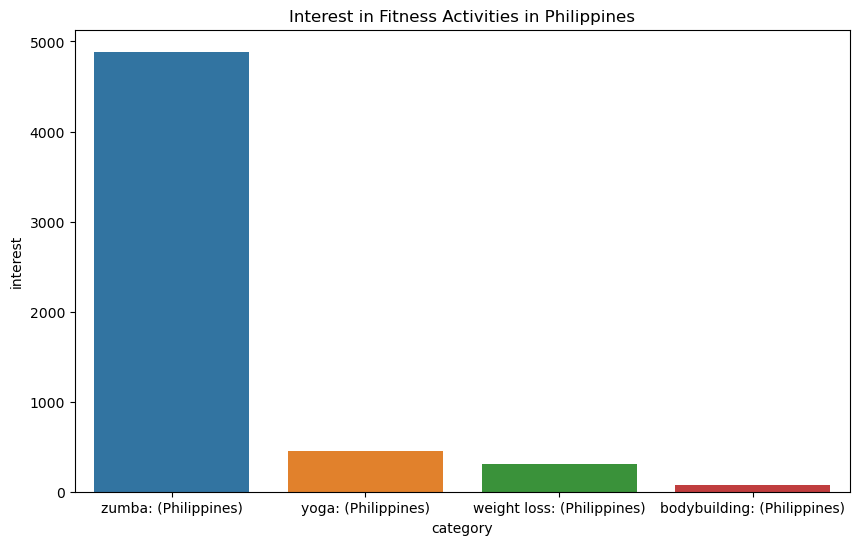

In [209]:
plt.figure(figsize = (10,6))
sns.barplot(data = cat_phil, x = 'category', y = 'interest')
plt.title("Interest in Fitness Activities in Philippines" )
plt.show()

In [210]:
top_cat_Philippines = 'zumba: (Philippines)'

###### we find that zumba generated the highest interest in Philippines